## Notebook for making parity plots for manuscript (Figure 2(d,e,f))

**Created on 31st August, 2022; modified on 2nd December; remodified on 27th February, 2024; re-remodified on 5th February, 2025**

In [2]:
# import chemprop
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs 
import pickle

In [4]:
%%bash
pwd
ls -ltr

/Users/riteshk/Library/CloudStorage/Box-Box/Research-postdoc/liquid-electrolyte-ML/Chem-Mater-R1/manuscript-plots
total 28848
-rw-r--r--@ 1 riteshk  staff    52049 Jan 22 15:03 plot_cond_expt_valid_ml_fig5b_012225.eps
-rw-r--r--  1 riteshk  staff      208 Jan 22 15:03 act_energy_expt_valid_ml_fig5b_012225.csv
-rw-------@ 1 riteshk  staff   844288 Jan 29 08:14 emol_expt_measured_022324_.xls
-rw-r--r--@ 1 riteshk  staff    19694 Jan 29 08:16 plot_oxstab_expt-ml-dft_fig_5c_012925.eps
-rw-r--r--@ 1 riteshk  staff    19540 Jan 29 08:20 plot_ce_expt-ml_fig5d_012925.eps
-rw-r--r--@ 1 riteshk  staff   169633 Jan 29 09:26 plot_fig5bcd.ai
-rw-r--r--@ 1 riteshk  staff   819279 Jan 29 09:26 plot_fig5bcd.jpg
-rw-r--r--  1 riteshk  staff     3688 Jan 29 14:50 preds_expt_chemprop_strat_expt_error.csv
-rw-r--r--@ 1 riteshk  staff    20494 Jan 31 14:40 plot_ce_expt-ml_fig5d_013125.eps
-rw-------@ 1 riteshk  staff    53858 Jan 31 14:40 compare-ml-expt_ce_fig5c.ipynb
-rw-r--r--@ 1 riteshk  staff    50709

### Target property: ionic conductivity (ML model: Chemprop)

In [3]:
def calc_error(df_true, df_pred):
    y_true = df_true['conductivity_log']
    y_pred = df_pred['conductivity_log']
    return np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred)

In [4]:
path = '../conductivity/'

In [5]:
df_true_train_strat2 = pd.read_csv(path + 'stratified-split/train_strat_comm.csv')
df_true_val_strat2 = pd.read_csv(path + 'stratified-split/val_strat_comm.csv')
df_true_test_strat2 = pd.read_csv(path + 'stratified-split/test_strat_comm.csv')
df_pred_train_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_train_comm_strat2_rd_cdf_s800_e3.csv')
df_pred_val_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_val_comm_strat2_rd_cdf_s800_e3.csv')
df_pred_test_strat2 = pd.read_csv(path + 'stratified-split/deploy/edb/preds_test_comm_strat2_rd_cdf_s800_e3.csv')
df_pred_train_strat2

,solv_comb_sm,salt_sm,conductivity_log,conductivity_log_ensemble_uncal_var
0,CC1COC(=O)O1.O=C1OCCO1,CC[N+](CC)(CC)CC.F[P-](F)(F)(F)(F)F,0.758566,0.000462
1,CC1COC(=O)O1.CCOC(=O)OCC,[B-](F)(F)(F)F.CC[N+](CC)(CC)CC,1.357849,0.000303
2,CC1COC(=O)O1.CCOC(=O)OCC,[B-](F)(F)(F)F.CC[N+](CC)(CC)CC,0.996903,0.000396
3,CC1COC(=O)O1.CCOC(=O)OCC,[Li+].[B-]12(OC(=O)C(=O)O1)OC(=O)C(=O)O2,0.589111,0.000288
4,COCCOC.O=C1CCCO1,[Li+].F[P-](F)(F)(F)(F)F,0.421261,0.005008
...,...,...,...,...
8151,CC1COC(=O)O1.CCOC(=O)OCC,[Li+].F[P-](F)(F)(F)(F)F,0.993820,0.000195
8152,CC1COC(=O)O1,[Li+].F[P-](F)(F)(F)(F)F.COCCOCCOC.COCCOCCOC,0.661749,0.000826
8153,CC1COC(=O)O1,[Li+].[B-](F)(F)(F)F,-1.011218,0.006277
8154,CC1COC(=O)O1.CCOC(=O)OC.COC(=O)OC,[Li+].[B-]12(OC(=O)C(=O)O1)OC(=O)C(=O)O2,0.105733,0.000661


In [6]:
rmse_train_strat2, mae_train_strat2, r2_train_strat2 = calc_error(df_true_train_strat2, df_pred_train_strat2)
rmse_val_strat2, mae_val_strat2, r2_val_strat2 = calc_error(df_true_val_strat2, df_pred_val_strat2)
rmse_test_strat2, mae_test_strat2, r2_test_strat2 = calc_error(df_true_test_strat2, df_pred_test_strat2)

In [7]:
y_train_pred = df_pred_train_strat2['conductivity_log']; y_train_uncer = df_pred_train_strat2['conductivity_log_ensemble_uncal_var']; y_train_true = df_true_train_strat2['conductivity_log']
y_val_pred = df_pred_val_strat2['conductivity_log']; y_val_uncer = df_pred_val_strat2['conductivity_log_ensemble_uncal_var']; y_val_true = df_true_val_strat2['conductivity_log']
y_test_pred = df_pred_test_strat2['conductivity_log']; y_test_uncer = df_pred_test_strat2['conductivity_log_ensemble_uncal_var']; y_test_true = df_true_test_strat2['conductivity_log']

In [8]:
print("RMSE train/val/test: ", rmse_train_strat2, rmse_val_strat2, rmse_test_strat2)
print("MAE train/val/test: ", mae_train_strat2, mae_val_strat2, mae_test_strat2)
print("R2 train/val/test: ", r2_train_strat2, r2_val_strat2, r2_test_strat2)

RMSE train/val/test:  0.1372381761509823 0.20156403499300443 0.1839290282584005
MAE train/val/test:  0.06341835376459184 0.0881925795380827 0.08669512896103783
R2 train/val/test:  0.9650233520354137 0.9230253227314985 0.9392809311641164


#### old hexabin parity plot: removed on request of reviewer-3

In [16]:
# def scatter_hist(x, y, ax, ax_histx, size, color_map, color):
#     ax_histx.tick_params(axis="x", labelbottom=False)
#     # ax_histy.tick_params(axis="y", labelleft=False)

#     # the scatter plot:
#     ax.hexbin(x, y, gridsize=size, bins='log', cmap=color_map, edgecolors=None)

#     # now determine nice limits by hand:
#     binwidth = 0.15
#     binwidth = (axmax - axmin) / 100

#     # bins = np.arange(-lim, lim + binwidth, binwidth)
#     bins = np.arange(axmin, axmax + binwidth, binwidth)
#     residual = x-y
#     # ax_histx.hist(x, bins=bins, color=color) ## original snippet
#     ax_histx.bar(x, residual, width=binwidth, color=color, edgecolor='white', linewidth=0.5)
#     # ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)

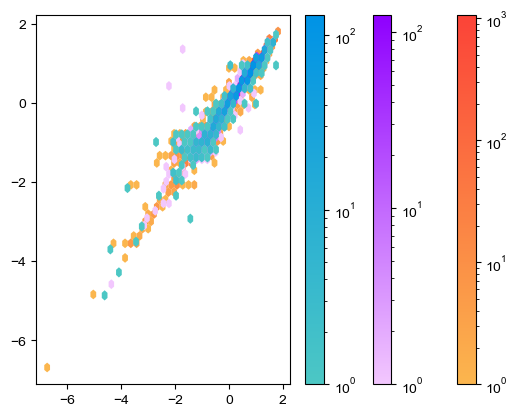

In [15]:
# fig, ax = plt.subplots()
# extent = [min(y_train_true), max(y_train_true), min(y_train_pred), max(y_train_pred)]
# norm = plt.Normalize(axmin, axmax)

# cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0.298, 0.78, 0.77),(0, 0.576, 0.902)]) ## anvil, blue
# # cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0.298, 0.78, 0.77),'blue'])
# cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0.95, 0.78, 0.996),(0.557, 0, 0.998)]) ## pink, dark purple
# cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0.984, 0.713, 0.305),(0.984, 0.262, 0.219)]) ## orange, red
# # cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list("", [(0.984, 0.713, 0.305),(0.349,0.745,0.306)]) ## orange, green
# hb = ax.hexbin(y_train_true, y_train_pred, gridsize=40, cmap=cmap3, bins='log', edgecolors=None)
# hb1 = ax.hexbin(y_val_true, y_val_pred, gridsize=30, cmap=cmap2, bins='log', edgecolors=None)
# hb2 = ax.hexbin(y_test_true, y_test_pred, gridsize=30, cmap=cmap1, bins='log', edgecolors=None)
# # hb = ax.hexbin(y_train_true, y_train_pred, gridsize=50, cmap='Blues', bins='log', edgecolors='white') ## original snippet
# # ax0.set(xlim=xlim, ylim=ylim)
# # ax0.set_title("Hexagon binning")
# cb = fig.colorbar(hb)
# cb1 = fig.colorbar(hb1)
# cb2 = fig.colorbar(hb2)
# # cb2 = fig.colorbar(hb2, ax=ax, label='counts')
# # plt.show()
# plt.savefig('legend_hexbin_performance_cond_chem_022724.eps', dpi=300)

#### Scatter parity plot

In [ ]:
axmin = min(min(y_train_true), min(y_train_pred)) - 0.1*(max(y_train_true)-min(y_train_true))
axmax = max(max(y_train_true), max(y_train_pred)) + 0.1*(max(y_train_true)-min(y_train_true))

In [25]:
blue = (0, 0.576, 0.902) # 0, 147, 230
green = (0.349,0.745,0.306) # 89, 190, 78
red = (0.984, 0.262, 0.219) # 251, 67, 56 
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
purple = (0.839, 0.286, 0.604) # 214, 73, 1541
anvil = (0.298, 0.78, 0.77) # 76, 199, 196
dark_purple = (0.557, 0, 0.998) # 142, 0, 252
pink = (0.95, 0.78, 0.996) # 242, 199, 154
gray = (0.463,0.463,0.463) # 118, 118, 118

In [24]:
def scatter_hist(x, y, ax, ax_histx, size, color):
    ax_histx.tick_params(axis="x", labelbottom=False)
    # ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    # ax.hexbin(x, y, gridsize=size, bins='log', edgecolors=None) ## hexabin parity plot
    ax.scatter(x, y, edgecolors='white', linewidths=0.25, s=size, color=color)

    # now determine nice limits by hand:
    binwidth = 0.15
    binwidth = (axmax - axmin) / 100

    # bins = np.arange(-lim, lim + binwidth, binwidth)
    bins = np.arange(axmin, axmax + binwidth, binwidth)
    residual = x-y
    # ax_histx.hist(x, bins=bins, color=color) ## original snippet
    ax_histx.bar(x, residual, width=binwidth, color=color, edgecolor='white', linewidth=0.5)
    # ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)

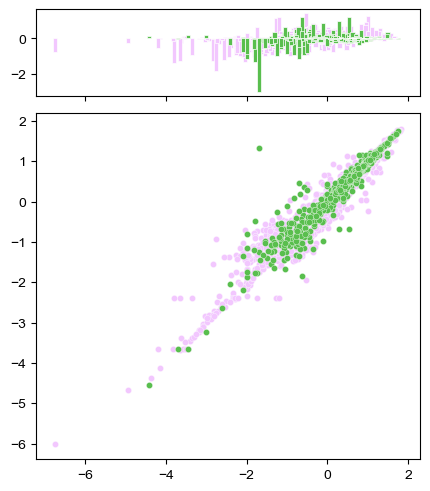

In [35]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# fig, ax = plt.figure(figsize=(5, 5))

ax = fig.add_gridspec(top=0.5, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)

x1 = y_train_true; y1 = y_train_pred
x2 = y_val_true; y2 = y_val_pred
x3 = y_test_true; y3 = y_test_pred
scatter_hist(x1, y1, ax, ax_histx, 20, pink)
scatter_hist(x2, y2, ax, ax_histx, 20, green)

# plt.show()
plt.savefig('plot_parity_perf_cond_chem_strat_figS7a_020525.eps', dpi=300)

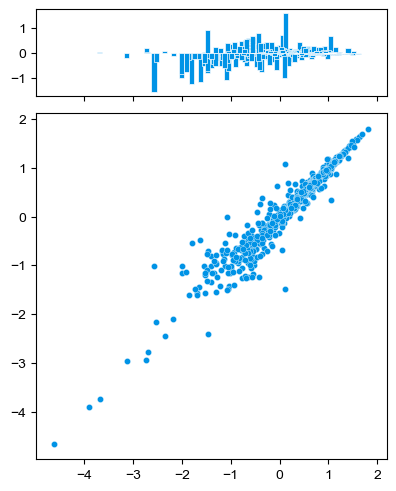

In [36]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# fig, ax = plt.figure(figsize=(5, 5))

ax = fig.add_gridspec(top=0.5, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)

x1 = y_train_true; y1 = y_train_pred
x2 = y_val_true; y2 = y_val_pred
x3 = y_test_true; y3 = y_test_pred
scatter_hist(x3, y3, ax, ax_histx, 20, blue)

# plt.show()
plt.savefig('plot_parity_perf_cond_chem_strat_fig2d_020525.eps', dpi=300)

### Target property: Oxidative stability (ML model: Chemprop)

In [37]:
def calc_error(df_true, df_pred):
    y_true = df_true['IE']
    y_pred = df_pred['IE']
    return np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred)

In [38]:
path = '../oxstab/'

In [39]:
df_true_train_rand = pd.read_csv(path + 'random-split/train_random.csv')
df_true_val_rand = pd.read_csv(path + 'random-split/val_random.csv')
df_true_test_rand = pd.read_csv(path + 'random-split/test_random.csv')
df_pred_train_rand = pd.read_csv(path + 'random-split/deploy/mp/preds_oxstab_train_rand_rd_e3_s400.csv')
df_pred_val_rand = pd.read_csv(path + 'random-split/deploy/mp/preds_oxstab_val_rand_e3_s400.csv')
df_pred_test_rand = pd.read_csv(path + 'random-split/deploy/mp/preds_oxstab_test_rand_e3_s400.csv')

In [40]:
rmse_train_rand, mae_train_rand, r2_train_rand = calc_error(df_true_train_rand, df_pred_train_rand)
rmse_val_rand, mae_val_rand, r2_val_rand = calc_error(df_true_val_rand, df_pred_val_rand)
rmse_test_rand, mae_test_rand, r2_test_rand = calc_error(df_true_test_rand, df_pred_test_rand)

In [41]:
y_train_pred = df_pred_train_rand['IE']; y_train_uncer = df_pred_train_rand['IE_ensemble_uncal_var']; y_train_true = df_true_train_rand['IE']
y_val_pred = df_pred_val_rand['IE']; y_val_uncer = df_pred_val_rand['IE_ensemble_uncal_var']; y_val_true = df_true_val_rand['IE']
y_test_pred = df_pred_test_rand['IE']; y_test_uncer = df_pred_test_rand['IE_ensemble_uncal_var']; y_test_true = df_true_test_rand['IE']

In [42]:
axmin = min(min(y_train_true), min(y_train_pred)) - 0.1*(max(y_train_true)-min(y_train_true))
axmax = max(max(y_train_true), max(y_train_pred)) + 0.1*(max(y_train_true)-min(y_train_true))

In [43]:
print("RMSE train/val/test: {}/{}/{}".format(rmse_train_rand, rmse_val_rand, rmse_test_rand))
print("MAE train/val/test: {}/{}/{}".format(mae_train_rand, mae_val_rand, mae_test_rand))
print("R2 train/val/test: {}/{}/{}".format(r2_train_rand, r2_val_rand, r2_test_rand))

RMSE train/val/test: 0.08714400961395391/0.19308515581030253/0.20288614817961653
MAE train/val/test: 0.050937551354656364/0.10697013784582544/0.10841212076264142
R2 train/val/test: 0.9945196590984842/0.9722474378149608/0.9699053424307936


#### Scatter parity plot

In [44]:
blue = (0, 0.576, 0.902) # 0, 147, 230
green = (0.349,0.745,0.306) # 89, 190, 78
red = (0.984, 0.262, 0.219) # 251, 67, 56 
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
purple = (0.839, 0.286, 0.604) # 214, 73, 1541
anvil = (0.298, 0.78, 0.77) # 76, 199, 196
dark_purple = (0.557, 0, 0.998) # 142, 0, 252
pink = (0.95, 0.78, 0.996) # 242, 199, 154
gray = (0.463,0.463,0.463) # 118, 118, 118

In [45]:
def scatter_hist(x, y, ax, ax_histx, size, color):
    ax_histx.tick_params(axis="x", labelbottom=False)
    # ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    # ax.hexbin(x, y, gridsize=size, bins='log', edgecolors=None) ## hexabin parity plot
    ax.scatter(x, y, edgecolors='white', linewidths=0.25, s=size, color=color)

    # now determine nice limits by hand:
    binwidth = 0.15
    binwidth = (axmax - axmin) / 100

    # bins = np.arange(-lim, lim + binwidth, binwidth)
    bins = np.arange(axmin, axmax + binwidth, binwidth)
    residual = x-y
    # ax_histx.hist(x, bins=bins, color=color) ## original snippet
    ax_histx.bar(x, residual, width=binwidth, color=color, edgecolor='white', linewidth=0.5)
    # ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)

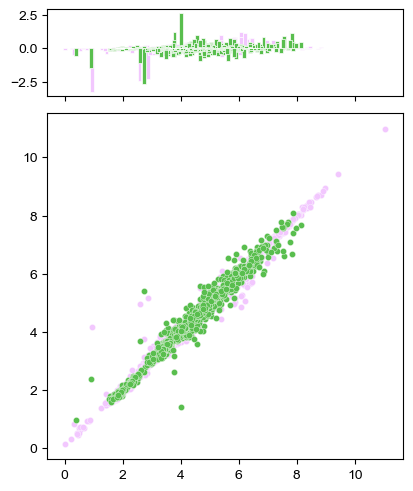

In [46]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# fig, ax = plt.figure(figsize=(5, 5))

ax = fig.add_gridspec(top=0.5, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)

x1 = y_train_true; y1 = y_train_pred
x2 = y_val_true; y2 = y_val_pred
x3 = y_test_true; y3 = y_test_pred
scatter_hist(x1, y1, ax, ax_histx, 20, pink)
scatter_hist(x2, y2, ax, ax_histx, 20, green)

# plt.show()
plt.savefig('plot_parity_perf_oxstab_chem_rand_figS7b_020525.eps', dpi=300)

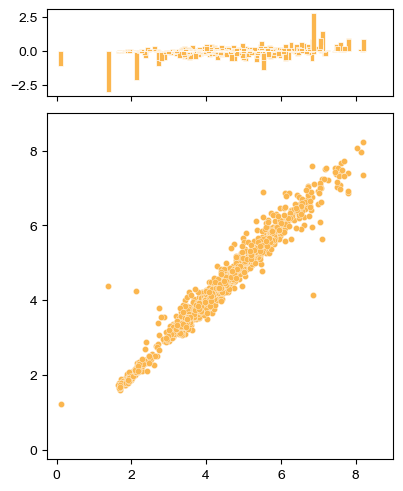

In [51]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# fig, ax = plt.figure(figsize=(5, 5))

ax = fig.add_gridspec(top=0.5, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax.set_xlim(-0.25, 9)
ax.set_ylim(-0.25, 9)

x1 = y_train_true; y1 = y_train_pred
x2 = y_val_true; y2 = y_val_pred
x3 = y_test_true; y3 = y_test_pred
scatter_hist(x3, y3, ax, ax_histx, 20, orange)

# plt.show()
plt.savefig('plot_parity_perf_oxstab_chem_rand_fig2e_020525.eps', dpi=300)

### Target property: Coulombic efficiency (ML model: PLSR)

In [52]:
def calc_error(df_true, df_pred):
    y_true = df_true['log(1-CE)']
    y_pred = df_pred['log(1-CE)']
    return np.sqrt(mean_squared_error(y_true, y_pred)), mean_absolute_error(y_true, y_pred), r2_score(y_true, y_pred)

In [63]:
path = '../CE/stratified-split/'

In [60]:
!ls ../CE/stratified-split/

deploy/                               plsr_model_strat_ncomp_11_fold_5.sav
plsr_model_strat_ncomp_11_fold_1.sav  strat_rs30_test_gr_comb_add.csv
plsr_model_strat_ncomp_11_fold_2.sav  strat_rs30_train_gr_comb_add.csv
plsr_model_strat_ncomp_11_fold_3.sav  strat_rs30_val_gr_comb_add.csv
plsr_model_strat_ncomp_11_fold_4.sav


In [72]:
df_true_train_strat2 = pd.read_csv(path + 'strat_rs30_train_gr_comb_add.csv')
df_true_val_strat2 = pd.read_csv(path + 'strat_rs30_val_gr_comb_add.csv')
df_true_test_strat2 = pd.read_csv(path + 'strat_rs30_test_gr_comb_add.csv')
df_true_ood = pd.read_csv(path + 'ce_ood_final_comp.csv')

In [73]:
X_train = df_true_train_strat2.iloc[:, 2:-2]  # Assuming first two columns are descriptions
y_train = df_true_train_strat2.iloc[:, -2].values
X_val = df_true_val_strat2.iloc[:, 2:-2]
y_val = df_true_val_strat2.iloc[:, -2].values
X_test = df_true_test_strat2.iloc[:, 2:-2]
y_test = df_true_test_strat2.iloc[:, -2].values
X_ood = df_true_ood.iloc[:, 2:-1]
y_ood = df_true_ood.iloc[:, -1].values

## scaling the data
scaler = MinMaxScaler().fit(X_train.iloc[:,-13:])
X_train_scaled = scaler.transform(X_train.iloc[:,-13:])
X_train_ = np.concatenate((X_train.iloc[:,:-13], X_train_scaled), axis=1)
X_val_scaled = scaler.transform(X_val.iloc[:,-13:])
X_val_ = np.concatenate((X_val.iloc[:,:-13], X_val_scaled), axis=1)
X_test_scaled = scaler.transform(X_test.iloc[:,-13:])
X_test_ = np.concatenate((X_test.iloc[:,:-13], X_test_scaled), axis=1)
X_ood_scaled = scaler.transform(X_ood.iloc[:,-13:])
X_ood_ = np.concatenate((X_ood.iloc[:,:-13], X_ood_scaled), axis=1)

In [74]:
pred_train_array = []; pred_val_array = []; pred_test_array = []; pred_array = []
for i in range(1,6):
    filename = path + f'plsr_model_strat_ncomp_11_fold_{i}.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    y_pred_train = loaded_model.predict(X_train_)
    pred_train_array.append(y_pred_train)
    y_pred_val = loaded_model.predict(X_val_)
    pred_val_array.append(y_pred_val)
    y_pred_test = loaded_model.predict(X_test_)
    pred_test_array.append(y_pred_test)
    y_pred_ood = loaded_model.predict(X_ood_)
    pred_array.append(y_pred_ood)

y_pred_ood_avg = np.mean(pred_array, axis=0)
y_pred_ood_avg = np.ravel(y_pred_ood_avg)
y_pred_ood_std = np.std(pred_array, axis=0)
y_pred_ood_std = np.ravel(y_pred_ood_std)
# df['log(1-CE)'] = y_pred_ood_avg
# df['log(1-CE)_uncal_var'] = y_pred_ood_std

## calculate the average of the predictions on train, val and test
y_pred_train_avg = np.mean(pred_train_array, axis=0); y_pred_val_avg = np.mean(pred_val_array, axis=0); y_pred_test_avg = np.mean(pred_test_array, axis=0)
r2_train = r2_score(y_train, y_pred_train_avg); rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_avg)); mae_train = mean_absolute_error(y_train, y_pred_train_avg)
r2_val = r2_score(y_val, y_pred_val_avg); rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val_avg)); mae_val = mean_absolute_error(y_val, y_pred_val_avg)
r2_test = r2_score(y_test, y_pred_test_avg); rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_avg)); mae_test = mean_absolute_error(y_test, y_pred_test_avg)
print(f"RMSE train: {rmse_train} & RMSE val: {rmse_val} & RMSE test: {rmse_test}")
print(f"R2 train: {r2_train} & R2 val: {r2_val} & R2 test: {r2_test}")
print(f"MAE train: {mae_train} & MAE val: {mae_val} & MAE test: {mae_test}")
rmse_ood = np.sqrt(mean_squared_error(y_ood, y_pred_ood_avg)); mae_ood = mean_absolute_error(y_ood, y_pred_ood_avg); r2_ood = r2_score(y_ood, y_pred_ood_avg)
print(f"Avg RMSE ood: {rmse_ood}, Avg MAE ood: {mae_ood}, Avg R2 ood: {r2_ood}")
# df.to_csv(f'./stratified-split-2-cv/pred_ce_ood_final_comp{ncomp}_strat2.csv', index=False)

RMSE train: 0.3017095165970308 & RMSE val: 0.38394536159884446 & RMSE test: 0.4110886311472843
R2 train: 0.7277064001945004 & R2 val: 0.48043911454335053 & R2 test: 0.5568982376847902
MAE train: 0.21485294651157702 & MAE val: 0.3205916598250504 & MAE test: 0.30336821458722707
Avg RMSE ood: 0.3765413332285016, Avg MAE ood: 0.2844631842190987, Avg R2 ood: 0.17054889028166387


In [79]:
y_train_true = df_true_train_strat2['log(1-CE)']; y_train_pred = y_pred_train_avg; y_train_uncer = np.std(pred_train_array, axis=0)
y_val_true = df_true_val_strat2['log(1-CE)']; y_val_pred = y_pred_val_avg; y_val_uncer = np.std(pred_val_array, axis=0)
y_test_true = df_true_test_strat2['log(1-CE)']; y_test_pred = y_pred_test_avg; y_test_uncer = np.std(pred_test_array, axis=0)

In [78]:
np.std(pred_train_array, axis=0)
np.mean(pred_train_array, axis=0)

array([[-1.759651  ],
       [-1.60404307],
       [-0.79913207],
       [-1.4028488 ],
       [-1.90505207],
       [-2.35880598],
       [-1.10568232],
       [-0.85790898],
       [-2.21992029],
       [-1.27476722],
       [-2.17765025],
       [-1.92667384],
       [-1.92226683],
       [-1.76551522],
       [-2.22828496],
       [-0.88254085],
       [-1.46820691],
       [-1.54899224],
       [-2.27995856],
       [-1.42566465],
       [-1.13754464],
       [-1.67044448],
       [-0.83479221],
       [-1.25261832],
       [-0.84595402],
       [-1.97010907],
       [-1.31700242],
       [-1.41379204],
       [-1.59109624],
       [-2.0628018 ],
       [-1.2492136 ],
       [-1.52286977],
       [-1.88320045],
       [-1.42134827],
       [-1.44689164],
       [-0.86826128],
       [-1.41884888],
       [-2.13809889],
       [-1.37240149],
       [-1.12173867],
       [-2.35831105],
       [-1.28826547],
       [-2.00026264],
       [-0.76918827],
       [-1.81857413],
       [-2

In [80]:
axmin = min(min(y_train_true), min(y_train_pred)) - 0.1*(max(y_train_true)-min(y_train_true))
axmax = max(max(y_train_true), max(y_train_pred)) + 0.1*(max(y_train_true)-min(y_train_true))

#### Scatter parity plot

In [82]:
blue = (0, 0.576, 0.902) # 0, 147, 230
green = (0.349,0.745,0.306) # 89, 190, 78
red = (0.984, 0.262, 0.219) # 251, 67, 56 
orange = (0.984, 0.713, 0.305) # 251, 182, 78 
purple = (0.839, 0.286, 0.604) # 214, 73, 1541
anvil = (0.298, 0.78, 0.77) # 76, 199, 196
dark_purple = (0.557, 0, 0.998) # 142, 0, 252
pink = (0.95, 0.78, 0.996) # 242, 199, 154
gray = (0.463,0.463,0.463) # 118, 118, 118

In [83]:
def scatter_hist(x, y, ax, ax_histx, size, color):
    ax_histx.tick_params(axis="x", labelbottom=False)
    # ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    # ax.hexbin(x, y, gridsize=size, bins='log', edgecolors=None) ## hexabin parity plot
    ax.scatter(x, y, edgecolors='white', linewidths=0.25, s=size, color=color)

    # now determine nice limits by hand:
    binwidth = 0.15
    binwidth = (axmax - axmin) / 100

    # bins = np.arange(-lim, lim + binwidth, binwidth)
    bins = np.arange(axmin, axmax + binwidth, binwidth)
    residual = x-y
    # ax_histx.hist(x, bins=bins, color=color) ## original snippet
    ax_histx.bar(x, residual, width=binwidth, color=color, edgecolor='white', linewidth=0.5)
    # ax_histy.hist(y, bins=bins, orientation='horizontal', color=color)

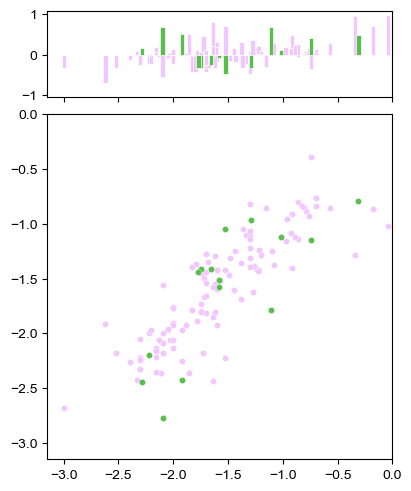

In [96]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# fig, ax = plt.figure(figsize=(5, 5))

ax = fig.add_gridspec(top=0.5, right=0.75).subplots()
# The main axes' aspect can be fixed.
ax.set(aspect=1)
ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)
ax.set_xlim(-3.15, 0.0)
ax.set_ylim(-3.15, 0.0)

x1 = y_train_true; y1 = y_train_pred.ravel()
x2 = y_val_true; y2 = y_val_pred.ravel()
x3 = y_test_true; y3 = y_test_pred.ravel()
scatter_hist(x1, y1, ax, ax_histx, 20, pink)
scatter_hist(x2, y2, ax, ax_histx, 20, green)

# plt.show()
plt.savefig('plot_parity_perf_ce_plsr_strat_figS7c_020525.eps', dpi=300)

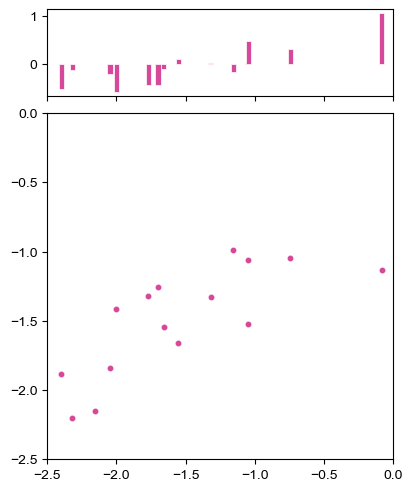

In [99]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# fig, ax = plt.figure(figsize=(5, 5))

ax = fig.add_gridspec(top=0.5, right=0.75).subplots()
# The main axes' aspect can be fixed.

ax_histx = ax.inset_axes([0, 1.05, 1, 0.25], sharex=ax)

x1 = y_train_true; y1 = y_train_pred.ravel()
x2 = y_val_true; y2 = y_val_pred.ravel()
x3 = y_test_true; y3 = y_test_pred.ravel()
scatter_hist(x3, y3, ax, ax_histx, 20, purple)
ax.set_xlim(-2.5, 0.0)
ax.set_ylim(-2.5, 0.0)
ax.set(aspect=1)

# plt.show()
plt.savefig('plot_parity_perf_ce_plsr_strat_fig2f_020525.eps', dpi=300)

In [92]:
print(y1.ravel()[2], y1[2])

-0.7991320693654312 [-0.79913207]


array([-1.60404307])